In [149]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel,cosine_similarity,rbf_kernel

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
crd=pd.read_csv('/content/drive/MyDrive/Dataset/tmdb_5000_credits.csv')
movie=pd.read_csv('/content/drive/MyDrive/Dataset/tmdb_5000_movies.csv')

In [52]:
crd.head(5)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [53]:
movie.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
movie.rename(columns={'id':'movie_id'},inplace=True)

In [55]:
merged = pd.merge(crd, movie, on='movie_id')

In [56]:
merged.head(5)

,movie_id,title_x,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [57]:
merged[(merged['original_title']!=merged['title_x']) | (merged['original_title'] != merged['title_y'])][['title_x','title_y','original_title','original_language']]

,title_x,title_y,original_title,original_language
97,Shin Godzilla,Shin Godzilla,シン・ゴジラ,ja
215,Fantastic 4: Rise of the Silver Surfer,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer,en
235,Asterix at the Olympic Games,Asterix at the Olympic Games,Astérix aux Jeux Olympiques,fr
317,The Flowers of War,The Flowers of War,金陵十三釵,zh
474,Evolution,Evolution,Évolution,fr
...,...,...,...,...
4699,The World Is Mine,The World Is Mine,Lumea e a mea,ro
4719,The Married Woman,The Married Woman,Une femme mariée: Suite de fragments d'un film...,fr
4751,Gabriela,Gabriela,"Gabriela, Cravo e Canela",pt
4790,The Circle,The Circle,دایره,fa


In [58]:
merged[merged['title_y']!=merged['title_x']][['title_x','title_y']]

,title_x,title_y


In [59]:
merged.drop(['homepage','production_countries','original_title','title_y','status'],axis=1,inplace=True)
merged.head(5)

,movie_id,title_x,cast,crew,budget,genres,keywords,original_language,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124


In [60]:
merged[merged['budget']==0].shape[0]

1037

In [61]:
merged[merged['revenue']==0].shape[0]

1427

In [62]:
merged[merged['runtime']==0].shape[0]

35

In [63]:
import re
stop = list(stopwords.words('english'))
def word_freq(s):
  s_list=s.lower().split()
  out=[]
  counted=[]
  for i in s_list:
    if i not in stop:
      if i not in counted:
        j=s_list.count(i)
        j=s_list.count(i)
        counted.append(i)
        out.append([i,j])  
  return out
title_text= ''.join(merged['title_x'])
title_text= re.sub(r'[^A-Za-z ]+','',title_text)
freq=word_freq(title_text)
freq=sorted(freq,key=lambda k:k[1],reverse=True)
freq=freq[:50]

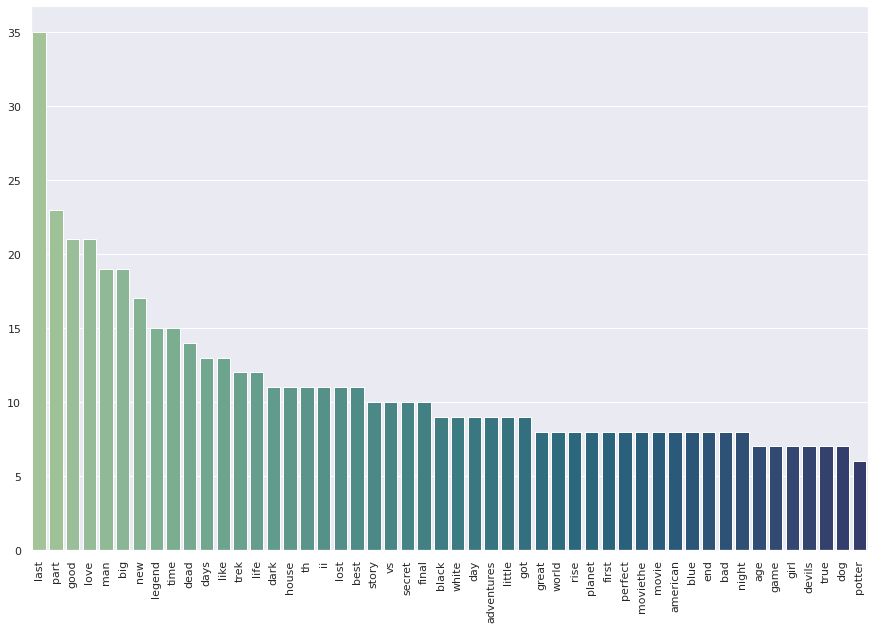

In [64]:
ax=sns.barplot(x=[r[0] for r in freq],y=[r[1] for r in freq],palette='crest')
ax.tick_params(axis='x', rotation=90)

In [65]:
merged['production_companies'][0]

'[{"name": "Ingenious Film Partners", "id": 289}, {"name": "Twentieth Century Fox Film Corporation", "id": 306}, {"name": "Dune Entertainment", "id": 444}, {"name": "Lightstorm Entertainment", "id": 574}]'

In [66]:
import ast

merged['production_companies']=merged['production_companies'].fillna('[]').apply(ast.literal_eval)

In [67]:
merged['production_companies'] = merged['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [84]:
merged['production_companies']

0       [Ingenious Film Partners, Twentieth Century Fo...
1       [Walt Disney Pictures, Jerry Bruckheimer Films...
2                        [Columbia Pictures, Danjaq, B24]
3       [Legendary Pictures, Warner Bros., DC Entertai...
4                                  [Walt Disney Pictures]
                              ...                        
4798                                  [Columbia Pictures]
4799                                                   []
4800    [Front Street Pictures, Muse Entertainment Ent...
4801                                                   []
4802         [rusty bear entertainment, lucky crow films]
Name: production_companies, Length: 4803, dtype: object

In [130]:
l=[]
for i in range(len(merged['production_companies'])):
  l.append(merged['production_companies'][i])
l=pd.DataFrame(l)
l=l.stack().reset_index(level=1,drop=True)
l.name='Companies'
pivot_com = merged.drop('production_companies', axis=1).join(l)

In [131]:
Com_rev=pd.DataFrame(np.array(pivot_com.groupby('Companies')['revenue'].sum()),columns=['Total Revenue']).join(pd.DataFrame(np.array(pivot_com.groupby('Companies')['revenue'].mean()),columns=['Average Revenue'])).join(pd.DataFrame(np.array(pivot_com.groupby('Companies')['revenue'].count()),columns=['Count']))

In [135]:
Com_rev=Com_rev.set_index(pd.DataFrame(pivot_com.groupby('Companies')['revenue'].count()).index).sort_values(by=['Total Revenue'],ascending=False)

In [137]:
Com_rev.head(5)

,Total Revenue,Average Revenue,Count
Companies,,,
Österreichischer Rundfunk (ORF),49155747874,1.540933e+08,319
África Filmes,42588465942,1.369404e+08,311
winchester films,40878523165,1.434334e+08,285
warner bross Turkey,39357151309,1.772845e+08,222
verture Films,28683256048,2.516075e+08,114


In [140]:
merged[['title_x','popularity']].sort_values(by=['popularity'],ascending=False).head(10)

,title_x,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


# **Recommendation**

In [145]:
ov_feat = TfidfVectorizer(min_df=5,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{2,}',
            stop_words = 'english')

In [147]:
mat = ov_feat.fit_transform(merged['overview'].fillna(''))
print(mat)
print(mat.shape)

  (0, 808)	0.30927244518567415
  (0, 203)	0.23443786963454266
  (0, 3409)	0.29873684348475393
  (0, 3077)	0.2853956924392387
  (0, 1743)	0.24225991625621743
  (0, 4441)	0.26845545216273403
  (0, 2831)	0.20005783588885226
  (0, 4598)	0.2716929932908035
  (0, 3132)	0.3290182348067739
  (0, 2867)	0.30547119542229445
  (0, 1296)	0.3134362431965026
  (0, 2699)	0.290254785971282
  (0, 729)	0.22369812357573893
  (1, 3459)	0.32596877101972577
  (1, 1426)	0.3235149966188074
  (1, 4541)	0.36082880555087254
  (1, 1394)	0.23183134919604706
  (1, 1406)	0.34763387729380707
  (1, 2022)	0.3312676041060614
  (1, 2549)	0.1433578009187306
  (1, 884)	0.22633945484021736
  (1, 1133)	0.2354395222809583
  (1, 475)	0.3439068095933729
  (1, 2594)	0.23420781013217265
  (1, 667)	0.27242191387568393
  :	:
  (4802, 1355)	0.41099460455691866
  (4802, 1071)	0.1800442994413469
  (4802, 2356)	0.1814691401847437
  (4802, 3796)	0.20549730227845933
  (4802, 1120)	0.1706976712420064
  (4802, 335)	0.20222548926492623
  (48

In [150]:
sig = sigmoid_kernel(mat, mat)
print(sig[0])

[0.76167968 0.76159416 0.76159416 ... 0.76159416 0.76159416 0.76159416]


In [151]:
cos=cosine_similarity(mat,mat)
print(cos[0])

[1. 0. 0. ... 0. 0. 0.]


In [152]:
rbf=rbf_kernel(mat,mat)
print(rbf[0])

[1.         0.99959275 0.99959275 ... 0.99959275 0.99959275 0.99959275]


In [154]:
idx = pd.Series(merged.index, index=merged['title_x']).drop_duplicates()

In [155]:
idx

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [158]:
def recom(title, sig=sig):
    id = idx[title]
    sig_scores = list(enumerate(sig[id]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[:20]
    movie_indices = [i[0] for i in sig_scores]
    return merged['title_x'].iloc[movie_indices]

In [159]:
print(recom('Guardians of the Galaxy'))

94        Guardians of the Galaxy
193                   After Earth
2900      Space Battleship Yamato
38       The Amazing Spider-Man 2
3649                Lovely, Still
1115           The Sweetest Thing
20         The Amazing Spider-Man
1572    Forgetting Sarah Marshall
572                          Hook
1290     Baahubali: The Beginning
3733                  Night Watch
461                 Lost in Space
641                      Due Date
1824         The Face of an Angel
4688           The Man from Earth
1239                The Musketeer
2921                   Drive Hard
1410                      Mirrors
1275                     Sunshine
790               American Sniper
Name: title_x, dtype: object
